In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# 1. data merge
* 데이터가 지역별로 나누어져 있으므로 지역 컬럼을 추가하여 하나로 합친다.

In [2]:
regions = [
    '강원',
    '경기',
    '경남',
    '경북',
    '광주',
    '대구',
    '대전',
    '부산',
    '서울',
    '세종',
    '울산',
    '인천',
    '전남',
    '전북',
    '제주',
    '충남',
    '충북'
]

In [3]:
col = pd.read_csv(f'./data/소상공인시장진흥공단_상가(상권)정보_강원_202206.csv').columns
col

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [4]:
pd.DataFrame(index=col)

""
상가업소번호
상호명
지점명
상권업종대분류코드
상권업종대분류명
상권업종중분류코드
상권업종중분류명
상권업종소분류코드
상권업종소분류명
표준산업분류코드


In [5]:
data = pd.DataFrame()
for region in regions:
    temp = pd.read_csv(f'./data/소상공인시장진흥공단_상가(상권)정보_{region}_202206.csv')
    temp.insert(0,'지역',region)
    data = data.append(temp)
data

,지역,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,강원,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,강원,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,강원,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,강원,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,강원,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91851,충북,18464876,광수가코다리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,4371025346004280007001720,NaN,충청북도 청주시 청원구 오창읍 과학산업2로 271,363884.0,28121.0,NaN,1,NaN,127.414962,36.709197
91852,충북,18469519,파티라운지운천,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,...,4311310400109520000015777,NaN,충청북도 청주시 흥덕구 사운로187번길 64-2,361841.0,28471.0,NaN,NaN,NaN,127.474862,36.644013
91853,충북,18444490,도배,NaN,F,생활서비스,F15,주택수리,F15A02,미장타일도배도장,...,4311310200102310017003360,세종회관,충청북도 청주시 서원구 사직대로 133-1,362832.0,28567.0,NaN,NaN,NaN,127.462285,36.635306
91854,충북,18446727,황금물류,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,...,4311112000101990001048789,금천현대아파트,충청북도 청주시 상당구 중고개로337번길 23,360766.0,28727.0,113,NaN,NaN,127.504480,36.629324


In [6]:
data.to_csv('./data/data.csv',index=False)
data.head()

,지역,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,강원,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,강원,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,강원,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,강원,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,강원,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668


# 2. 데이터 전처리

In [ ]:
data = pd.read_csv('./data/data.csv')
data

In [7]:
data.columns

Index(['지역', '상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
meaningful_cols = [
    '지점명', '상권업종소분류코드',
    '행정동코드', '대지구분코드',
    '건물관리번호','경도', '위도'
]

In [27]:
clear_data = data[meaningful_cols]
clear_data

,지점명,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,NaN,D23A04,4215057100,1,4215011100110960006010791,128.904472,37.770252
1,NaN,O01A01,4215058000,1,4215011300100010001017124,128.920908,37.791299
2,NaN,O01A01,4276038000,1,4276038024102450036000001,128.717971,37.660051
3,NaN,O01A01,4215035000,1,4215035029100920001000002,129.052902,37.654680
4,NaN,D15A01,4213066000,1,4213011500111400020035715,127.917307,37.327668
...,...,...,...,...,...,...,...
91851,NaN,Q01A01,4311425300,1,4371025346004280007001720,127.414962,36.709197
91852,NaN,D02A02,4311370000,1,4311310400109520000015777,127.474862,36.644013
91853,NaN,F15A02,4311253000,1,4311310200102310017003360,127.462285,36.635306
91854,NaN,F08A03,4311168000,1,4311112000101990001048789,127.504480,36.629324


In [18]:
clear_data.dtypes

지점명           object
상권업종소분류코드     object
행정동코드          int64
대지구분코드         int64
건물관리번호        object
경도           float64
위도           float64
dtype: object

In [19]:
clear_data.isna().sum()

지점명          2001141
상권업종소분류코드          0
행정동코드              0
대지구분코드             0
건물관리번호             0
경도                 0
위도                 0
dtype: int64

# 2.1 결측치 제거
* 지점명의 경우 NULL인 경우 지점이 없는 것으로 One-Hot-Encoding한다.
    * 0: 지점 없음
    * 1: 지점 있음

In [13]:
clear_data

,지점명,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,NaN,D23A04,4215057100,1,4215011100110960006010791,128.904472,37.770252
1,NaN,O01A01,4215058000,1,4215011300100010001017124,128.920908,37.791299
2,NaN,O01A01,4276038000,1,4276038024102450036000001,128.717971,37.660051
3,NaN,O01A01,4215035000,1,4215035029100920001000002,129.052902,37.654680
4,NaN,D15A01,4213066000,1,4213011500111400020035715,127.917307,37.327668
...,...,...,...,...,...,...,...
91851,NaN,Q01A01,4311425300,1,4371025346004280007001720,127.414962,36.709197
91852,NaN,D02A02,4311370000,1,4311310400109520000015777,127.474862,36.644013
91853,NaN,F15A02,4311253000,1,4311310200102310017003360,127.462285,36.635306
91854,NaN,F08A03,4311168000,1,4311112000101990001048789,127.504480,36.629324


In [28]:
clear_data['지점명'] = np.where(clear_data['지점명'].isna(), 0, 1)

In [29]:
clear_data.isna().sum()

지점명          0
상권업종소분류코드    0
행정동코드        0
대지구분코드       0
건물관리번호       0
경도           0
위도           0
dtype: int64

# 2.2 컬럼 가공
* 상권업종소분류코드 : 상권업종소분류코드의 앞 3자리는 상권업종대분류코드와 상권업종중분류코드이므로 제거
* 지점명 : 지점유무로 컬럼이름 변경

In [30]:
clear_data['상권업종소분류코드'] = clear_data['상권업종소분류코드'].str[3:]
clear_data

,지점명,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,0,A04,4215057100,1,4215011100110960006010791,128.904472,37.770252
1,0,A01,4215058000,1,4215011300100010001017124,128.920908,37.791299
2,0,A01,4276038000,1,4276038024102450036000001,128.717971,37.660051
3,0,A01,4215035000,1,4215035029100920001000002,129.052902,37.654680
4,0,A01,4213066000,1,4213011500111400020035715,127.917307,37.327668
...,...,...,...,...,...,...,...
91851,0,A01,4311425300,1,4371025346004280007001720,127.414962,36.709197
91852,0,A02,4311370000,1,4311310400109520000015777,127.474862,36.644013
91853,0,A02,4311253000,1,4311310200102310017003360,127.462285,36.635306
91854,0,A03,4311168000,1,4311112000101990001048789,127.504480,36.629324


In [31]:
clear_data.rename(columns={'지점명':'지점유무'}, inplace=True)
clear_data

,지점유무,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,0,A04,4215057100,1,4215011100110960006010791,128.904472,37.770252
1,0,A01,4215058000,1,4215011300100010001017124,128.920908,37.791299
2,0,A01,4276038000,1,4276038024102450036000001,128.717971,37.660051
3,0,A01,4215035000,1,4215035029100920001000002,129.052902,37.654680
4,0,A01,4213066000,1,4213011500111400020035715,127.917307,37.327668
...,...,...,...,...,...,...,...
91851,0,A01,4311425300,1,4371025346004280007001720,127.414962,36.709197
91852,0,A02,4311370000,1,4311310400109520000015777,127.474862,36.644013
91853,0,A02,4311253000,1,4311310200102310017003360,127.462285,36.635306
91854,0,A03,4311168000,1,4311112000101990001048789,127.504480,36.629324


# 2.3 분류형 데이터 수치형으로 변환
* 상권업종소분류코드 : 상권업종소분류코드의 앞자리는 알파벳 A, B이므로 16진수로 간주하고 10진수로 변환하여 label encoding하여 수치형으로 변환한다.
* 건물관리번호 : 건물관리번호 컬럼은 object형이나 수치형데이터이므로 형변환한다.

In [32]:
clear_data['상권업종소분류코드'].str[0].unique()

array(['A', 'B'], dtype=object)

In [33]:
clear_data['상권업종소분류코드'] = clear_data['상권업종소분류코드'].apply(int, base=16)

In [34]:
clear_data['건물관리번호'] = clear_data['건물관리번호'].astype(float)

In [35]:
clear_data

,지점유무,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,0,2564,4215057100,1,4.215011e+24,128.904472,37.770252
1,0,2561,4215058000,1,4.215011e+24,128.920908,37.791299
2,0,2561,4276038000,1,4.276038e+24,128.717971,37.660051
3,0,2561,4215035000,1,4.215035e+24,129.052902,37.654680
4,0,2561,4213066000,1,4.213012e+24,127.917307,37.327668
...,...,...,...,...,...,...,...
91851,0,2561,4311425300,1,4.371025e+24,127.414962,36.709197
91852,0,2562,4311370000,1,4.311310e+24,127.474862,36.644013
91853,0,2562,4311253000,1,4.311310e+24,127.462285,36.635306
91854,0,2563,4311168000,1,4.311112e+24,127.504480,36.629324


In [49]:
clear_data.to_csv('./data/clear_data.csv', index=False)

# 2.4 정규화

In [41]:
scaler = StandardScaler()
scaler.fit(clear_data)
scaled_data = scaler.transform(clear_data)
scaled_df = pd.DataFrame(scaled_data, columns = clear_data.columns)
scaled_df

,지점유무,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도
0,-0.42582,-0.141748,0.546274,-0.052763,0.544117,1.591631,1.140186
1,-0.42582,-0.236825,0.546274,-0.052763,0.544118,1.610672,1.159408
2,-0.42582,-0.236825,0.596284,-0.052763,0.594127,1.375572,1.039540
3,-0.42582,-0.236825,0.546256,-0.052763,0.544137,1.763585,1.034635
4,-0.42582,-0.236825,0.544641,-0.052763,0.542479,0.448016,0.735978
...,...,...,...,...,...,...,...
2363989,-0.42582,-0.236825,0.625306,-0.052763,0.671966,-0.133943,0.171134
2363990,-0.42582,-0.205132,0.625260,-0.052763,0.623032,-0.064550,0.111602
2363991,-0.42582,-0.205132,0.625164,-0.052763,0.623032,-0.079120,0.103649
2363992,-0.42582,-0.173440,0.625095,-0.052763,0.622869,-0.030238,0.098186


In [36]:
scaled_df.to_csv('./data/train_data.csv', index=False)

# 3. 모델링1

# 3.1 cluster 개수 선정
* cluster 개수에 따른 inertia를 보고 elbow method를 적용하여 적정 cluster 개수를 정한다.

In [ ]:
train_data = pd.read_csv('./data/train_data.csv')
train_data

In [5]:
r_data = pd.read_csv('./data/data.csv')
r_data

C:\Users\gw\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,지역,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,강원,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,강원,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,강원,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,강원,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,강원,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363989,충북,18464876,광수가코다리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,4371025346004280007001720,NaN,충청북도 청주시 청원구 오창읍 과학산업2로 271,363884.0,28121.0,NaN,1,NaN,127.414962,36.709197
2363990,충북,18469519,파티라운지운천,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,...,4311310400109520000015777,NaN,충청북도 청주시 흥덕구 사운로187번길 64-2,361841.0,28471.0,NaN,NaN,NaN,127.474862,36.644013
2363991,충북,18444490,도배,NaN,F,생활서비스,F15,주택수리,F15A02,미장타일도배도장,...,4311310200102310017003360,세종회관,충청북도 청주시 서원구 사직대로 133-1,362832.0,28567.0,NaN,NaN,NaN,127.462285,36.635306
2363992,충북,18446727,황금물류,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,...,4311112000101990001048789,금천현대아파트,충청북도 청주시 상당구 중고개로337번길 23,360766.0,28727.0,113,NaN,NaN,127.504480,36.629324


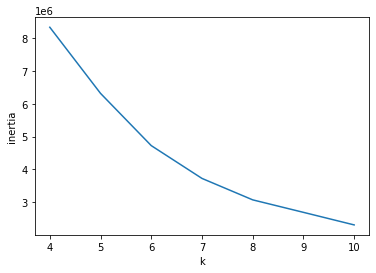

In [45]:
inertia = []
for k in range(4, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(train_data)
    inertia.append(km.inertia_)

plt.plot(range(4, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 3.2 모델학습

In [47]:
km = KMeans(n_clusters=6, random_state=0)
km.fit(train_data)

KMeans(n_clusters=6, random_state=0)

In [48]:
Counter(km.labels_)

Counter({2: 571676, 0: 1104383, 5: 292618, 4: 6563, 3: 49037, 1: 339717})

# 3.3 학습 결과 확인

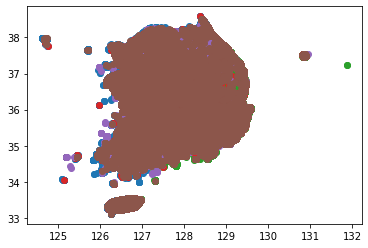

In [59]:
for i in range(6):
    cond = km.labels_ == i
    plt.scatter(clear_data.loc[cond,'경도'], clear_data.loc[cond,'위도'])
plt.show()

In [62]:
commercial = [0]*6
for i in range(6):
    cond = km.labels_ == i
    commercial[i] = Counter(r_data.loc[cond,'상권업종소분류명']).most_common(20)
    print(commercial[i])
    print()
    print()

[('한식/백반/한정식', 99152), ('여성미용실', 52548), ('부동산중개', 48757), ('커피전문점/카페/다방', 37961), ('청과물소매', 22486), ('수퍼마켓', 19367), ('자동차정비/카센타', 18434), ('비만/피부관리', 18121), ('호프/맥주', 17455), ('일반의류', 17325), ('학원-입시', 15625), ('갈비/삼겹살', 14789), ('라면김밥분식', 13973), ('유리/페인트/철물건축자재', 13676), ('꽃집/꽃배달', 13424), ('화장품판매점', 13411), ('세탁소/빨래방', 13252), ('식료품점', 11846), ('중국음식/중국집', 11281), ('모텔/여관/여인숙', 11085)]


[('한식/백반/한정식', 27394), ('커피전문점/카페/다방', 19466), ('부동산중개', 15581), ('여성미용실', 15224), ('종합소매', 7402), ('일반의류', 7345), ('편의점', 7141), ('비만/피부관리', 6388), ('호프/맥주', 5811), ('라면김밥분식', 5605), ('사업경영상담', 5148), ('학원-입시', 4695), ('화장품판매점', 4603), ('세탁소/빨래방', 4554), ('후라이드/양념치킨', 4176), ('사진관', 3979), ('정통양식/경양식', 3901), ('제과점', 3866), ('갈비/삼겹살', 3827), ('수퍼마켓', 3619)]


[('한식/백반/한정식', 55013), ('여성미용실', 30070), ('부동산중개', 20533), ('커피전문점/카페/다방', 20378), ('일반의류', 9859), ('비만/피부관리', 9840), ('자동차정비/카센타', 9731), ('수퍼마켓', 9104), ('청과물소매', 8627), ('갈비/삼겹살', 8517), ('라면김밥분식', 8433), ('호프/맥주', 8427), ('학원-입시', 8257)

# 문제점 및 해결방법
* 학습결과 clust들의 업종이 겹치는 것을 확인할 수 있었다.
* 따라서 위치정보 및 건물번호를 학습 데이터에서 제거하여 다시 학습한다.

In [67]:
train_data2 = train_data[['지점유무', '상권업종소분류코드']]
train_data2

,지점유무,상권업종소분류코드
0,-0.42582,-0.141748
1,-0.42582,-0.236825
2,-0.42582,-0.236825
3,-0.42582,-0.236825
4,-0.42582,-0.236825
...,...,...
2363989,-0.42582,-0.236825
2363990,-0.42582,-0.205132
2363991,-0.42582,-0.205132
2363992,-0.42582,-0.173440


# 4. 모델링2

# 4.1 cluster 개수 선정
* cluster 개수에 따른 inertia를 보고 elbow method를 적용하여 적정 cluster 개수를 정한다.

In [69]:
train_data2 = clear_data[['지점유무', '상권업종소분류코드']]

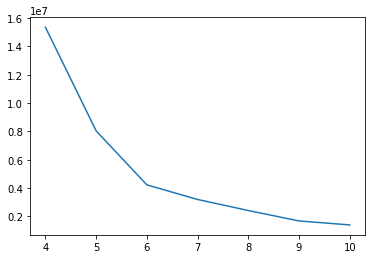

In [71]:
inertia = []
for k in range(4, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(train_data2)
    inertia.append(km.inertia_)

plt.plot(range(4, 11), inertia)
plt.show()

# 4.2 모델학습

In [75]:
km = KMeans(n_clusters=6, random_state=0)
km.fit(train_data2)

KMeans(n_clusters=6, random_state=0)

In [76]:
Counter(km.labels_)

Counter({4: 444597, 0: 1638969, 3: 213034, 1: 27437, 5: 18261, 2: 21696})

# 4.3 학습 결과 확인

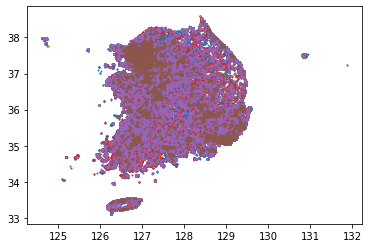

In [77]:
for i in range(6):
    cond = km.labels_ == i
    plt.scatter(clear_data.loc[cond,'경도'], clear_data.loc[cond,'위도'],s=1)
plt.show()

In [8]:
raw_result = r_data[['시도명', '시도코드', '시군구명', '시군구코드',
                     '행정동명', '행정동코드', '상호명', '상권업종소분류명',
                     '경도', '위도']]
raw_result

,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,상호명,상권업종소분류명,경도,위도
0,강원도,42,강릉시,42150,포남1동,4215057100,동그라미중고타이어,타이어판매,128.904472,37.770252
1,강원도,42,강릉시,42150,초당동,4215058000,세인트존스호텔Ohcrab,호텔/콘도,128.920908,37.791299
2,강원도,42,평창군,42760,대관령면,4276038000,평창라마다호텔,호텔/콘도,128.717971,37.660051
3,강원도,42,강릉시,42150,옥계면,4215035000,호텔탑스텐스카이라운지,호텔/콘도,129.052902,37.654680
4,강원도,42,원주시,42130,무실동,4213066000,레이디가구,일반가구소매,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...
2363989,충청북도,43,청주시 청원구,43114,오창읍,4311425300,광수가코다리,한식/백반/한정식,127.414962,36.709197
2363990,충청북도,43,청주시 흥덕구,43113,운천.신봉동,4311370000,파티라운지운천,꽃집/꽃배달,127.474862,36.644013
2363991,충청북도,43,청주시 서원구,43112,사창동,4311253000,도배,미장타일도배도장,127.462285,36.635306
2363992,충청북도,43,청주시 상당구,43111,금천동,4311168000,황금물류,고객관리대행,127.504480,36.629324


In [85]:
raw_result['지점유무'] = clear_data['지점유무']
raw_result['상권'] = km.labels_
raw_result

,상권업종소분류명,행정동코드,시도명,시군구명,행정동명,경도,위도,상권
0,타이어판매,4215057100,강원도,강릉시,포남1동,128.904472,37.770252,4
1,호텔/콘도,4215058000,강원도,강릉시,초당동,128.920908,37.791299,0
2,호텔/콘도,4276038000,강원도,평창군,대관령면,128.717971,37.660051,0
3,호텔/콘도,4215035000,강원도,강릉시,옥계면,129.052902,37.654680,0
4,일반가구소매,4213066000,강원도,원주시,무실동,127.917307,37.327668,0
...,...,...,...,...,...,...,...,...
2363989,한식/백반/한정식,4311425300,충청북도,청주시 청원구,오창읍,127.414962,36.709197,0
2363990,꽃집/꽃배달,4311370000,충청북도,청주시 흥덕구,운천.신봉동,127.474862,36.644013,0
2363991,미장타일도배도장,4311253000,충청북도,청주시 서원구,사창동,127.462285,36.635306,0
2363992,고객관리대행,4311168000,충청북도,청주시 상당구,금천동,127.504480,36.629324,0


In [14]:
raw_result.to_csv('./data/raw_result.csv', index=False)

# 5. 데이터 후처리

## 5.1 piedata 가공

In [18]:
pie = raw_result[['행정동코드', '상권업종소분류명', '상권']]
pie.rename(columns={'행정동코드':'지역코드'}, inplace=True)
pie.rename(columns={'상권업종소분류명':'업종'}, inplace=True)
pie

,지역코드,업종,상권
0,4215057100,타이어판매,0
1,4215058000,호텔/콘도,0
2,4276038000,호텔/콘도,0
3,4215035000,호텔/콘도,0
4,4213066000,일반가구소매,0
...,...,...,...
2363989,4311425300,한식/백반/한정식,0
2363990,4311370000,꽃집/꽃배달,0
2363991,4311253000,미장타일도배도장,0
2363992,4311168000,고객관리대행,0


In [ ]:
na = np.empty((3522,34))
na[:] = np.NaN
df_pie = pd.DataFrame(na, columns = [
    '지역코드',
    'Top1 상권', 'Top1 상권 수', 'Top1 상권 비율',
    'Top1 상권 Top1 업종', 'Top1 상권 Top1 업종 수',
    'Top1 상권 Top2 업종', 'Top1 상권 Top2 업종 수',
    'Top1 상권 Top3 업종', 'Top1 상권 Top3 업종 수',
    'Top2 상권', 'Top2 상권 수', 'Top2 상권 비율',
    'Top2 상권 Top1 업종', 'Top2 상권 Top1 업종 수',
    'Top2 상권 Top2 업종', 'Top2 상권 Top2 업종 수',
    'Top2 상권 Top3 업종', 'Top2 상권 Top3 업종 수',
    'Top3 상권', 'Top3 상권 수', 'Top3 상권 비율',
    'Top3 상권 Top1 업종', 'Top3 상권 Top1 업종 수',
    'Top3 상권 Top2 업종', 'Top3 상권 Top2 업종 수',
    'Top3 상권 Top3 업종', 'Top3 상권 Top3 업종 수',
    'Top4 상권', 'Top4 상권 수', 'Top4 상권 비율',
    'Top5 상권', 'Top5 상권 수', 'Top5 상권 비율'
])
df_pie

In [ ]:
df_pie.iloc[:,0] = pie['지역코드'].unique()
df_pie

In [ ]:
for r_code in tqdm(pp['지역코드'].unique()):
    commercial_df = pp.loc[pp['지역코드']==r_code, ['상권', '업종']]
    commercial_counter = Counter(commercial_df['상권']).most_common(5)
    cond = df_pie['지역코드'] == r_code
    for i, x in enumerate(commercial_counter[:3]+[0]*(3-len(commercial_counter[:3]))):
        if x != 0:
            c_code, c_count = x
            df_pie.iloc[cond,1 + i*9:1 + i*9+3] = [c_code, c_count, c_count]
            kind_counter = Counter(commercial_df.loc[commercial_df['상권']==c_code, '업종']).most_common(3)
            for j, y in enumerate(kind_counter+[0]*(3-len(kind_counter))):
                if y != 0:
                    df_pie.iloc[cond,1 + i*9+3 + j*2:1 + i*9+3 + (j+1)*2] = y
                else:
                    df_pie.iloc[cond,1 + i*9+3 + j*2:1 + i*9+3 + (j+1)*2] = [np.NaN]*2
        else:
            df_pie.iloc[cond,1 + i*9:1 + (i+1)*9] = [np.NaN]*9
    if len(commercial_counter) >= 3:
        code4, count4, code5, count5 = list(np.array(commercial_counter[3:]).flatten()) + [np.NaN]*(2*(5-len(commercial_counter)))
        df_pie.iloc[cond,1+3*9:] = code4, count4, count4, code5, count5, count5
    else:
        df_pie.iloc[cond,1+3*9:] = [np.NaN]*6

In [ ]:
df_pie

In [ ]:
df_pie.columns = ['행정동코드', 'Top1 상권', 'Top1 상권 수', 'Top1 상권 비율', 'Top1 상권 Top1 업종',
       'Top1 상권 Top1 업종 수', 'Top1 상권 Top2 업종', 'Top1 상권 Top2 업종 수',
       'Top1 상권 Top3 업종', 'Top1 상권 Top3 업종 수', 'Top2 상권', 'Top2 상권 수',
       'Top2 상권 비율', 'Top2 상권 Top1 업종', 'Top2 상권 Top1 업종 수', 'Top2 상권 Top2 업종',
       'Top2 상권 Top2 업종 수', 'Top2 상권 Top3 업종', 'Top2 상권 Top3 업종 수', 'Top3 상권',
       'Top3 상권 수', 'Top3 상권 비율', 'Top3 상권 Top1 업종', 'Top3 상권 Top1 업종 수',
       'Top3 상권 Top2 업종', 'Top3 상권 Top2 업종 수', 'Top3 상권 Top3 업종',
       'Top3 상권 Top3 업종 수', 'Top4 상권', 'Top4 상권 수', 'Top4 상권 비율', 'Top5 상권',
       'Top5 상권 수', 'Top5 상권 비율']
df_pie

In [ ]:
df_pie['행정동코드'] = df_pie['행정동코드'].astype(str).str[:-2]
df_pie

In [ ]:
# 상권코드가 있는 인덱스 리스트
commercial_code_index = np.array([1,10,19,28,31])
commercial_code_index

In [ ]:
commercial_name = {
    0:'주거밀집',
    1:'먹자골목',
    2:'편의시설',
    3:'기타',
    4:'스포츠',
}
commercial_name

In [ ]:
def set_name(x):
    if x == x:
        return commercial_name[x]
    return np.NaN

In [ ]:
for idx in commercial_code_index:
    df_pie.iloc[:,idx] = df_pie.iloc[:,idx].apply(set_name)
df_pie

In [ ]:
commercial_rate_index = np.array([3,12,21,30,33])

def get_rate(x):
    return x/sum(x[x==x])

df_pie.iloc[:,commercial_rate_index] = df_pie.iloc[:,commercial_rate_index].apply(get_rate, axis=1)
df_pie

In [ ]:
int_cols = [
    'Top1 상권 수',
    'Top1 상권 Top1 업종 수','Top1 상권 Top2 업종 수','Top1 상권 Top3 업종 수', 
    'Top2 상권 수',
    'Top2 상권 Top1 업종 수','Top2 상권 Top2 업종 수', 'Top2 상권 Top3 업종 수',
    'Top3 상권 수',
    'Top3 상권 Top1 업종 수', 'Top3 상권 Top2 업종 수','Top3 상권 Top3 업종 수',
    'Top4 상권 수',
    'Top5 상권 수']
df_pie.loc[:,int_cols] = df_pie.loc[:,int_cols].astype('Int64')
df_pie

In [ ]:
df_pie.to_csv('./data/piedata.csv', index=False)

In [ ]:
df_pie.columns = [
    'dong_code',
    't1', 't1_num', 't1_ratio',
    't1_t1', 't1_t1_num',
    't1_t2', 't1_t2_num',
    't1_t3', 't1_t3_num',
    't2', 't2_num', 't2_ratio',
    't2_t1', 't2_t1_num',
    't2_t2', 't2_t2_num',
    't2_t3', 't2_t3_num',
    't3', 't3_num', 't3_ratio',
    't3_t1', 't3_t1_num',
    't3_t2', 't3_t2_num',
    't3_t3', 't3_t3_num',
    't4', 't4_num', 't4_ratio',
    't5', 't5_num', 't5_ratio',
]

In [ ]:
df_pie = df_pie.fillna(np.nan).replace([np.nan], [None])

In [ ]:
import json
pie_dict = df_pie.to_dict('records')

pie_json = json.dumps(pie_dict)

text = str(json.loads(pie_json))

file = 'pie.json'
with open(file, 'w') as f:
    f.write(text)

## 5.2 mapdata 가공

In [ ]:
rawresult=pd.read_csv("./data/raw_result.csv")
rawresult

In [ ]:
rawresult['상권'].unique()

In [ ]:
rawresult.loc[rawresult['상권']==5, '상권'] = 2
rawresult

In [ ]:
rawresult.isna().sum()

In [ ]:
area=rawresult['행정동코드'].unique()
area

In [ ]:
area_commercial_counter = [0]*3522
for c in range(len(area)):
    area_commercial_counter[c] = {k:v for k,v in Counter(rawresult.loc[rawresult['행정동코드']==area[c], '상권']).most_common(3)}

In [ ]:
#딕셔너리 키를 리스트로 바꾼다
for i in range(len(area_commercial_counter)):
    area_commercial_counter[i]=list(area_commercial_counter[i].keys())

In [ ]:
resultdata=pd.DataFrame({'행정동코드':area,
                        'Top1':[-1 if len(x)<=0 else x[0] for x in area_commercial_counter],
                        'Top2':[-1 if len(x)<=1 else x[1] for x in area_commercial_counter],
                        'Top3':[-1 if len(x)<=2 else x[2] for x in area_commercial_counter]})
type(resultdata)

In [ ]:
resultdata.isna().sum()

In [ ]:
for i in range(1,4):
    for j in range(1,11):
        resultdata['Top%d_%dlng'%(i,j)]=[np.NaN]*3522
        resultdata['Top%d_%dlat'%(i,j)]=[np.NaN]*3522

In [ ]:
resultdata

In [ ]:
for i, n in enumerate(rawresult['행정동코드'].unique()):
    case=True   # 아까 top3상권이 있을수도, 없을수도 있다 했는데 이를 판별하기 위함.
    x=resultdata.loc[i]    #x=[행정동코드,top1상권, top2상권, top3상권,........,top3상권-10위도]
    for j in range(1,4):    #x의 1부터 3까지의 값이 유효한 값이기때문에(top1,2,3상권들) 해당 값으로 for문 돌림
        if x[j]==-1:    #만약 x[j]==-1이면(아까 너한테 말했듯이 top3상권이 존재하지 않는경우 -1로 채웠다고 했었음!) top3상권중 1개가 존재하지 않는거니까 case를 False로 바꾼다.
            case=False
        else:   # 그렇지 않은 경우, rawresult의 data들중 행정동코드는 x[0]이고 상권은 x[j](top1,2,3중 하나겠지)값인 데이터를 y에다가 저장한다.
            y=rawresult.loc[(rawresult['행정동코드']==x[0])&(rawresult['상권']==x[j]),:]
            y.index = np.array(range(len(y)))
        for k in range(1,11):   #이제 y의 열들 중 10개를 reesult data의 값에다가 넣어 줄 것임.
            if case:
                if len(y)>k:
                    resultdata.loc[i,'Top%d_%dlng'%(j,k)]=y.iloc[k,8:9][0]
                    resultdata.loc[i,'Top%d_%dlat'%(j,k)]=y.iloc[k,9:10][0]
            else:break  #만약 case가 False이면 top3상권이 존재하지 않으므로 해당 for문 탈출


In [ ]:
resultdata

In [ ]:
resultdata.loc[resultdata['Top1']==0,'Top1']="주거밀집"
resultdata.loc[resultdata['Top1']==1,'Top1']="먹자골목"
resultdata.loc[resultdata['Top1']==2,'Top1']="편의시설"
resultdata.loc[resultdata['Top1']==3,'Top1']="기타"
resultdata.loc[resultdata['Top1']==4,'Top1']="스포츠"
resultdata.loc[resultdata['Top1']==-1,'Top1']='null'

In [ ]:
resultdata.loc[resultdata['Top2']==0,'Top2']="주거밀집"
resultdata.loc[resultdata['Top2']==1,'Top2']="먹자골목"
resultdata.loc[resultdata['Top2']==2,'Top2']="편의시설"
resultdata.loc[resultdata['Top2']==3,'Top2']="기타"
resultdata.loc[resultdata['Top2']==4,'Top2']="스포츠"
resultdata.loc[resultdata['Top2']==-1,'Top2']='null'

In [ ]:
resultdata.loc[resultdata['Top3']==0,'Top3']="주거밀집"
resultdata.loc[resultdata['Top3']==1,'Top3']="먹자골목"
resultdata.loc[resultdata['Top3']==2,'Top3']="편의시설"
resultdata.loc[resultdata['Top3']==3,'Top3']="기타"
resultdata.loc[resultdata['Top3']==4,'Top3']="스포츠"
resultdata.loc[resultdata['Top3']==-1,'Top3']='null'

In [ ]:
resultdata=resultdata.fillna('null')

In [ ]:
resultdata

In [ ]:
resultdata.to_csv('mapdata.csv',index = False)

In [ ]:
import json

mapD = resultdata.to_dict('records')

map_json = json.dumps(mapD,ensure_ascii=False)

text = str(json.loads(map_json))

file = 'map.json'
with open(file, 'w',encoding="UTF-8") as f:
    f.write(text)